# 人脸识别

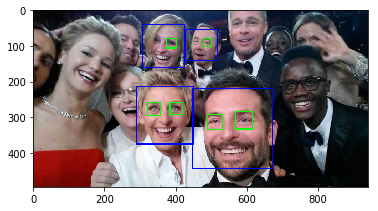

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 实例化人脸分类器
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
# 实例化眼睛分类器
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
# 读取测试图片
img = cv2.imread('images/12/faces.jpg',cv2.IMREAD_COLOR)
# 将原彩色图转换成灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 开始在灰度图上检测人脸，输出是人脸区域的外接矩形框
faces = face_cascade.detectMultiScale(gray, 1.2, 8)
# 遍历人脸检测结果
for (x,y,w,h) in faces:
    # 在原彩色图上画人脸矩形框
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 获取该人脸矩形框的感兴趣区域RoI, 浅复制
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # 开始在人脸区域中检测眼睛，输出是眼睛区域的外接矩形框
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # 遍历眼睛检测结构
    for (ex,ey,ew,eh) in eyes:
        # 在原彩色图上画眼睛矩形框
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# 显示画好矩形框的图片
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 人脸匹配

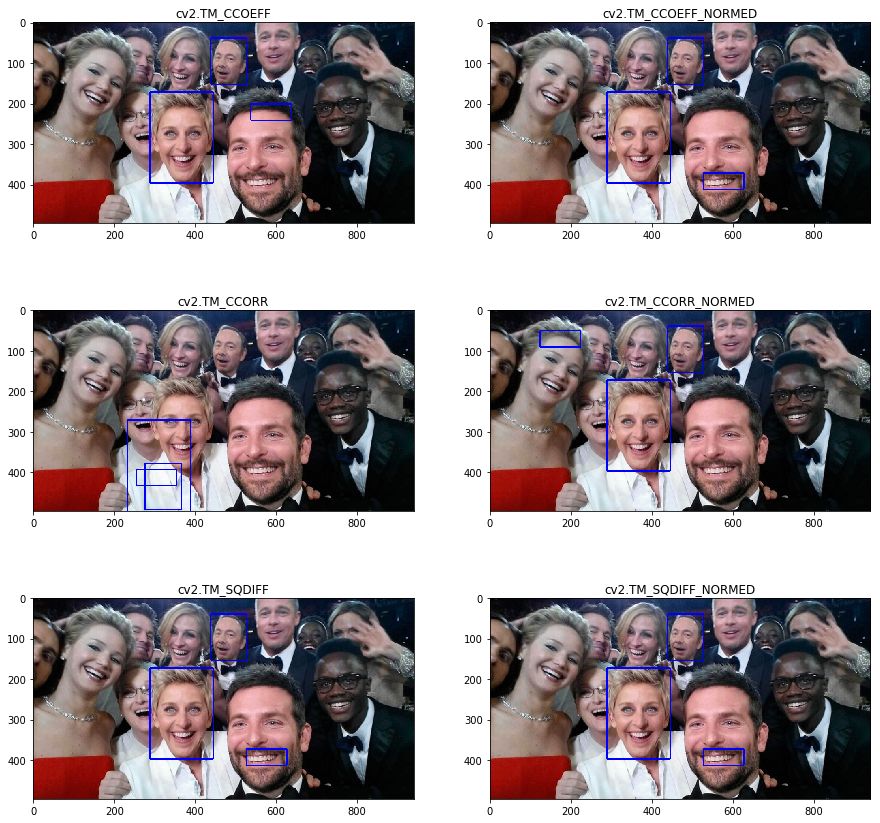

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 读取图片，彩色模式
img_color = cv2.imread('images/12/faces.jpg',cv2.IMREAD_COLOR)
# 读取图片，灰度模式
img_gray = cv2.imread('images/12/faces.jpg',cv2.IMREAD_GRAYSCALE)
# 读取人脸模板图片，灰度模式
templateList = [cv2.imread('images/12/face_template1.jpg',cv2.IMREAD_GRAYSCALE),
                cv2.imread('images/12/face_template2.jpg',cv2.IMREAD_GRAYSCALE),
                cv2.imread('images/12/mouth_template.png', cv2.IMREAD_GRAYSCALE)]

# 模板匹配方法数组
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# 遍历匹配方法
plt.figure(figsize=(15,15), edgecolor='w')
for i, meth in enumerate(methods):
    plt.subplot(3,2,i+1)
    # 拷贝图片
    img_color2 = img_color.copy()
    img_gray2 = img_gray.copy()
    # 把字符串转换成代码
    method = eval(meth)
    
    for template in templateList:
        w, h = template.shape[::-1]
        res = cv2.matchTemplate(img_gray2,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img_color2,top_left, bottom_right, 255, 2)
    
    plt.title(meth)
    plt.imshow(cv2.cvtColor(img_color2, cv2.COLOR_BGR2RGB))
plt.show()